In [29]:
from utils.bkg_model import Model
from utils.analysis.signal import Data, SixB

In [108]:
data = Data("/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/btag_pt/JetHT_Data_UL/JetHT_Run2018_full/ntuple.root", "config/bdt_params.cfg")
# bias_data = Data("/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/bias/JetHT_Data_UL/JetHT_Run2018_full/ntuple.root", "config/bdt_params.cfg")
sixb = SixB("/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/btag_pt/NMSSM/NMSSM_XYH_YToHH_6b_MX_1200_MY_300/ntuple.root", "config/bdt_params.cfg")
# bias_sixb = SixB("/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/bias/NMSSM/NMSSM_XYH_YToHH_6b_MX_1200_MY_300/ntuple.root", "config/bdt_params.cfg")

/eos/uscms/store/user/srosenzw/sixb/ntuples/Summer2018UL/btag_pt/NMSSM/NMSSM_XYH_YToHH_6b_MX_1200_MY_300/ntuple.root


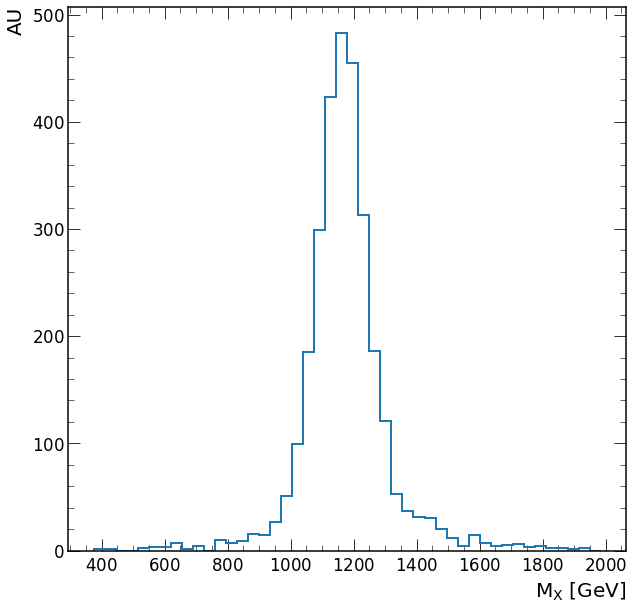

In [111]:
n_sixb = sixb.sr_hist()

In [112]:
[ak.min(data.jet_btag[:,i]) for i in range(6)], [ak.min(data.jet_pt[:,i]) for i in range(6)]

([0.7104492, 0.7104492, 0.2783203, 0.2783203, 0.0009937286, 0.0010852814],
 [20.375, 20.015625, 20.015625, 20.015625, 20.015625, 20.015625])

In [49]:
# [ak.min(sixb.jet_btag[:,i]) for i in range(6)], [ak.min(sixb.jet_pt[:,i]) for i in range(6)]

In [50]:
data.A_CR_avgbtag, sixb.A_SR_avgbtag

(array([0.55362064, 0.50041074, 0.6145401 , ..., 0.6754964 , 0.45809937,
        0.6244583 ], dtype=float32),
 array([0.793925  , 0.7677409 , 0.64677364, ..., 0.7754949 , 0.7554118 ,
        0.7952474 ], dtype=float32))

In [51]:
score_bins = np.linspace(0,1.01,101)

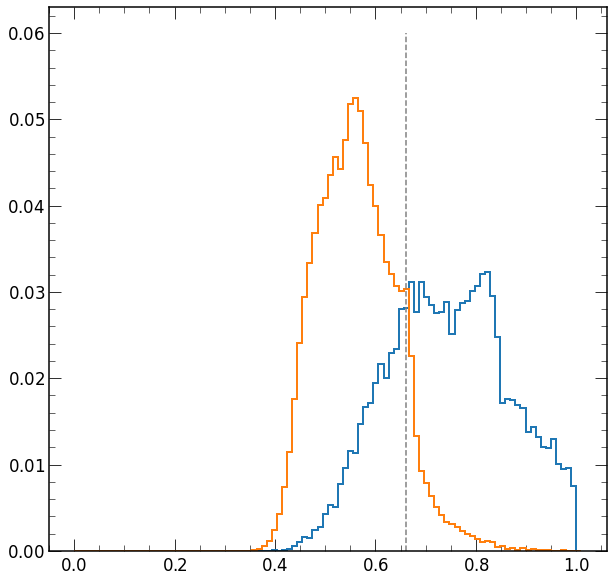

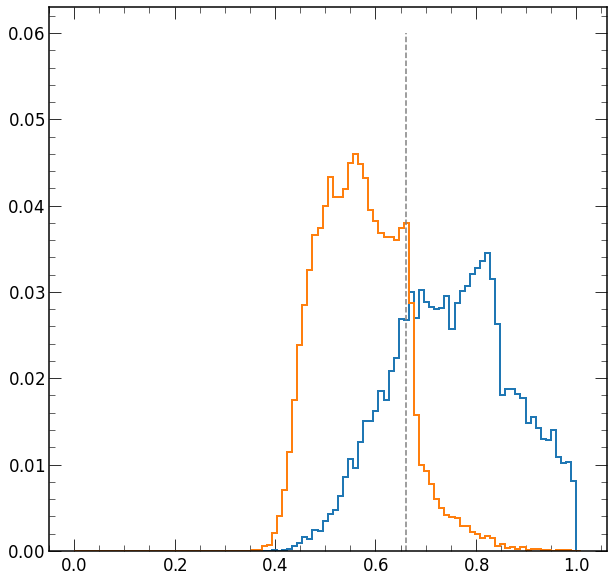

In [98]:
fig, ax = plt.subplots()

n = Hist(sixb.A_SR_avgbtag, bins=score_bins, ax=ax, density=True)
n = Hist(data.A_CR_avgbtag, bins=score_bins, ax=ax, density=True)
ax.plot([0.66,0.66], [0,0.06], color='gray', ls='--')

fig, ax = plt.subplots()

n = Hist(bias_sixb.A_SR_avgbtag, bins=score_bins, ax=ax, density=True)
n = Hist(bias_data.A_CR_avgbtag, bins=score_bins, ax=ax, density=True)
ax.plot([0.66,0.66], [0,0.06], color='gray', ls='--')

In [21]:
# fig, ax = plt.subplots(figsize=(12,10))

# mh_bins = np.linspace(50,300,100)
# n, xe, xy, im = Hist2d(bias_sixb.HX_m, bias_sixb.H1_m, bins=mh_bins, ax=ax)

In [99]:
# fig, ax = plt.subplots(figsize=(12,10))

# mh_bins = np.linspace(50,300,100)
# n, xe, xy, im = Hist2d(bias_data.HX_m[bias_data.blind_mask], bias_data.H1_m[bias_data.blind_mask], bins=mh_bins, ax=ax)

# fig, ax = plt.subplots(figsize=(12,10))

# mh_bins = np.linspace(50,300,100)
# n, xe, xy, im = Hist2d(data.HX_m[data.blind_mask], data.H1_m[data.blind_mask], bins=mh_bins, ax=ax)

.. training in validation region
.. initializing transfer factor
.. initializing dataframes of variables
.. calling reweight.GBReweighter
.. calling reweight.FoldingReweighter
.. calling reweighter.fit
.. predicting VR hs weights
.. training in analysis region
.. initializing transfer factor
.. initializing dataframes of variables
.. calling reweight.GBReweighter
.. calling reweight.FoldingReweighter
.. calling reweighter.fit for AR
.. predicting AR hs weights


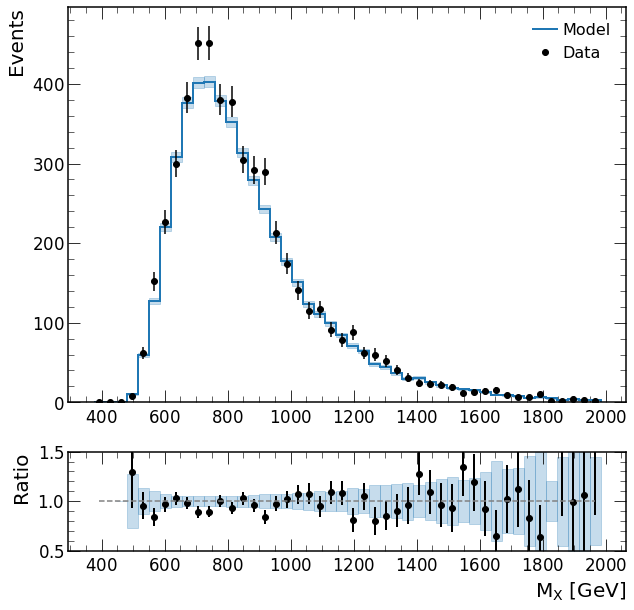

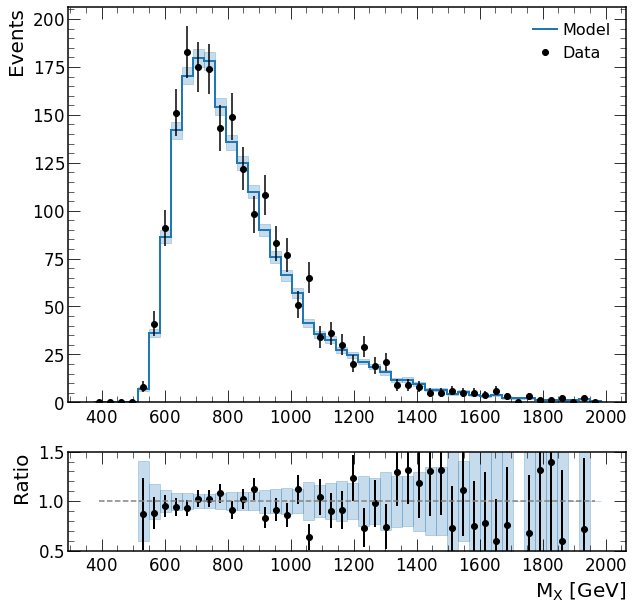

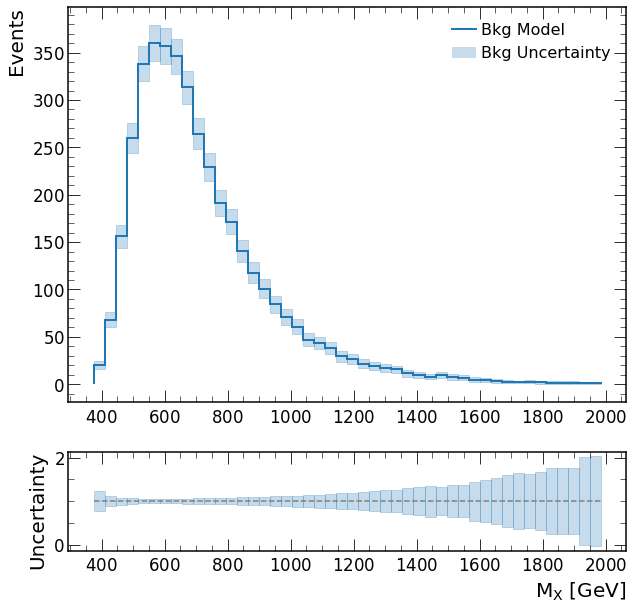

In [115]:
data.train()
_ = data.v_cr_hist()
_ = data.v_sr_hist()
n_data = data.sr_hist()

In [ ]:
canvas = ROOT.TCanvas('c1','c1', 600, 600)
canvas.SetFrameLineWidth(3)
canvas.Draw()

h_title = 'title'
ROOT_hist = ROOT.TH1D(h_title,";m_{X} [GeV];Events",nbins-1,array('d',list(m_bins)))
for i,(val) in enumerate(n):
    ROOT_hist.SetBinContent(i+1, val) 

ROOT_hist.Draw("hist")

In [116]:
Model(n_sixb, n_data)

AttributeError: 'tuple' object has no attribute 'error'